# Zadanie 2.1
Wygenerować następujące sygnały dyskretne:

a) Impuls jednostkowy oraz impuls przesunięty o 40 próbek.

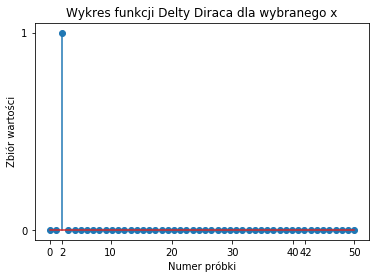

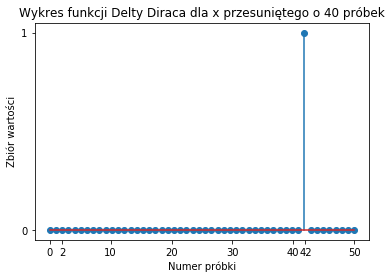

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
x=np.linspace(0,50,50)
y=signal.unit_impulse(50,2)
plt.title("Wykres funkcji Delty Diraca dla wybranego x")
plt.xlabel("Numer próbki")
plt.ylabel("Zbiór wartości")
plt.stem(x,y)
plt.xticks((0,2,10,20,30,40,42,50))
plt.yticks((0,1))
plt.show()
y2=signal.unit_impulse(50,41)
plt.stem(x,y2)
plt.title("Wykres funkcji Delty Diraca dla x przesuniętego o 40 próbek")
plt.xlabel("Numer próbki")
plt.ylabel("Zbiór wartości")
plt.xticks((0,2,10,20,30,40,42,50))
plt.yticks((0,1))
plt.show()

b) Przebiegi periodyczne (po 5 okresów, łącznie 200 próbek): 

sinusoidalny, piłokształtny, prostokątny, użyć funkcji sin, sawtooth, square.


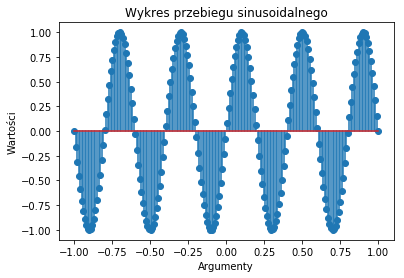

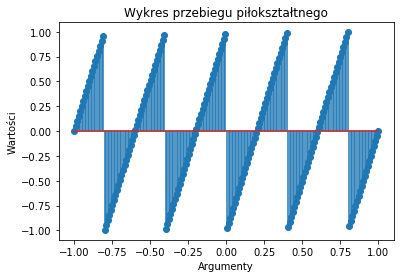

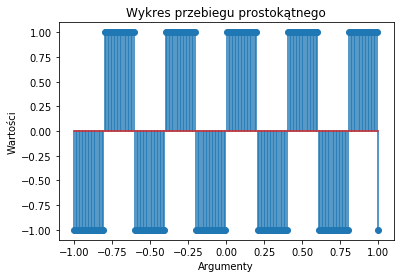

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
x=np.linspace(-1,1,200)
y=np.sin(5*np.pi*x)
z=signal.sawtooth(5*np.pi*x)
c=signal.square(5*np.pi*x)
plt.stem(x,y)
plt.title("Wykres przebiegu sinusoidalnego")
plt.xlabel("Argumenty")
plt.ylabel("Wartości")
plt.show()
plt.title("Wykres przebiegu piłokształtnego")
plt.xlabel("Argumenty")
plt.ylabel("Wartości")
plt.stem(x,z)
plt.show()
plt.title("Wykres przebiegu prostokątnego")
plt.xlabel("Argumenty")
plt.ylabel("Wartości")
plt.stem(x,c)
plt.show()

c) Szum gaussowski (200 próbek) dla parametrów: μ= 0 oraz σ$^2$ = 0.5.

Wygenerowane sygnały przedstawić na wykresach (w tym samym oknie),

użyć funkcji takich jak figure, plot, subplot, stem, axis, title, xlabel, ylabel, etc...

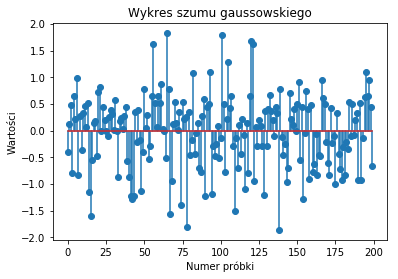

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
mi=0
delta=np.sqrt(0.5)
y=np.random.normal(mi,delta,200)
plt.figure()
plt.stem(y)
plt.title("Wykres szumu gaussowskiego")
plt.xlabel("Numer próbki")
plt.ylabel("Wartości")
plt.show()

# Zadanie 2.2

Napisać funkcję generującą dyskretny sygnał sinusoidalny y[n] = $A$sin(2$\pi$ f n / f$_s$ + $\phi$)

z następującymi parametrami A – amplituda, f – częstotliwość, φ – przesunięcie fazowe, fs – tempo próbkowania. 

Wygenerować kilka, przykładowych przebiegów, sporządzić wykresy, przeprowadzić testy odsłuchowe

(przy użyciu funkcji sound). Jaki wpływ na wrażenia słuchowe mają amplituda, częstotliwość i faza?

In [165]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pyaudio

def SinusoidalSignal(time,frequency,amplitude,phase):
    duration = time   # in seconds, may be float
    f = frequency     # sine frequency, Hz, may be float
    A = amplitude     # amplitude
    fi = phase        # phase shift
    # generate samples, note conversion to float32 array
    #+fi%*np.pi/180
    return A*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs)+(fi*np.pi/180))



p.terminate()
if __name__=="__main__":
    p = pyaudio.PyAudio()
    volume = 0.5     # range [0.0, 1.0]
    fs = 44100       # sampling rate, Hz, must be integer
    samples1 = SinusoidalSignal(3.0,444.0,50,0).astype(np.float32)
    samples2 = SinusoidalSignal(3.0,444.0,50,180).astype(np.float32)
    samples3 = SinusoidalSignal(3.0,444.0,500,0).astype(np.float32)
    samples4 = SinusoidalSignal(3.0,888.0,50,0).astype(np.float32)
    
    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    # play. May repeat with different volume values (if done interactively)
    stream.write(volume*samples1)
    stream.stop_stream()
    stream.close()
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    stream.write(volume*samples2)
    stream.stop_stream()
    stream.close()
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    stream.write(volume*samples3)
    stream.stop_stream()
    stream.close()
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    stream.write(volume*samples4)
    stream.stop_stream()
    stream.close()
    p.terminate()

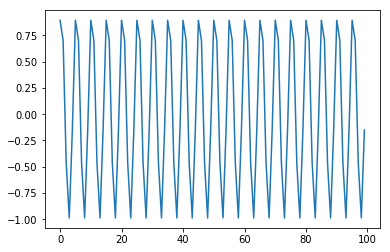

In [45]:
def sygnal (ampl, fr, pf, tp):
    n=np.arange(-1,1,1/((1/2)*tp))
    y=ampl*np.sin(2*np.pi*fr*n+pf)
    return y


z=sygnal(1,440,90,100)
plt.plot(z)
plt.show()

# Zadanie 2.3
Wykorzystując funkcję z poprzedniego zadania, zasymulować próbkowanie sygnału sinusoidalnego o częstotliwości 1kHz, 
zastosować różne wartości tempa próbkowania:

a) fs > 2 × f

b) fs = 2 × f

c) fs < 2 × f

Porównać przebiegi na wykresach (stosując tą samą skalę czasu). W którym z powyższych trzech przypadków warunek Nyquista był spełniony?
Zakładając ustaloną wartość fs, jakie zakresy zmienności parametrów f oraz φ wystarczają do spróbkowania wszystkich możliwych sygnałów o zadanej amplitudzie?

In [166]:
p = pyaudio.PyAudio()
volume = 0.5     # range [0.0, 1.0]
f=44100
# sampling rate, Hz, must be integer
fs1 = 3*f
fs2 = 2*f
fs3 = f

samples = SinusoidalSignal(2.0,f,50,0).astype(np.float32)
stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs1,output=True)
# play. May repeat with different volume values (if done interactively)
stream.write(volume*samples1)
stream.stop_stream()
stream.close()
stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs2,output=True)
# play. May repeat with different volume values (if done interactively)
stream.write(volume*samples1)
stream.stop_stream()
stream.close()
stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs3,output=True)
# play. May repeat with different volume values (if done interactively)
stream.write(volume*samples1)
stream.stop_stream()
stream.close()
p.terminate()

# Zadanie 2.4
Wykorzystując mikrofon oraz dowolną aplikację do rejestracji dźwięków (np. Audacity, Rejestrator Windows, etc...)

zarejestrować krótką wypowiedź np. odliczanie do trzech. Zarejestrowany sygnał zapisać do pliku wav.

Otworzyć plik w środowisku Matlab (patrz funkcja audioread).

Dokonać superpozycji sygnału mowy z sygnałem szumu gaussowskiego ( μ= 0, σ2 = 1).

Uwaga – przed zsumowaniem sygnałów, przemnożyć sygnał szumu przez odpowiedni współczynnik tak,

aby iloraz sygnał-szum (SNR) = 3dB. Sporządzić wykresy czasowe sygnału oryginalnego i zakłóconego.

Iloraz sygnal-szum wynosi: 3.058448520142907


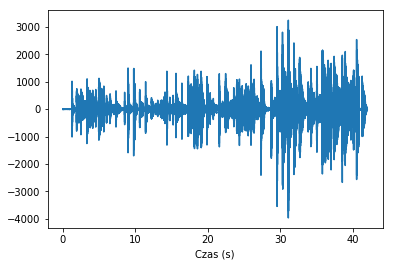

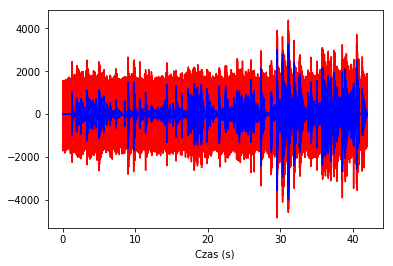

KeyboardInterrupt: 

In [161]:
import wave
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
fs = read('test.wav')[0]
signal = read('test.wav')[1]
t=np.arange(0,len(signal)/fs,1/fs)
k=460 #Wspolczynik
noise = k*np.random.normal(size=len(signal[:,0]),loc=0,scale=1)
db=20 * np.log10(abs(signal[:,0].max()/noise.max()))
print('Iloraz sygnal-szum wynosi: '+str(db))
plt.plot(t, signal[:,0]);
plt.xlabel('Czas (s)');
plt.show()
plt.plot(t, signal[:,0]+noise,'r',t, signal[:,0],'b');
plt.xlabel('Czas (s)');
plt.show()

In [162]:
wf = wave.open('test.wav', 'rb')
p = pyaudio.PyAudio()
chunk = 1024
# open stream based on the wave object which has been input.
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),channels=wf.getnchannels(),rate=wf.getframerate(),output=True)
data = wf.readframes(chunk)
# play stream (looping from beginning of file to the end)
while data != '':
    # writing to the stream is what *actually* plays the sound.
    stream.write(data)
    data = wf.readframes(chunk)
    # cleanup stuff.
stream.close()
p.terminate() 

KeyboardInterrupt: 